# __Analise: Checkout Data__

## Importando Dependências

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels as sm

import warnings
warnings.filterwarnings("ignore")


## Carregando Dados

In [2]:
df = pd.read_csv("dados/checkout_data.csv")
df.head()

,time,avg_last_30days,avg_last_7days,same_day_last_week,yesterday,today
0,00h,13.60,14.4,16.0,9.0,14.0
1,01h,4.90,5.2,2.0,4.0,6.0
2,02h,2.75,2.0,3.0,1.0,2.0
3,03h,1.15,0.6,1.0,1.0,NaN
4,04h,1.20,1.4,1.0,NaN,NaN


## Análise Exploratória

In [3]:
df.shape

(17, 6)

In [4]:
df.dtypes

time                   object
avg_last_30days       float64
avg_last_7days        float64
same_day_last_week    float64
yesterday             float64
today                 float64
dtype: object

In [5]:
df.isna().sum()

time                  0
avg_last_30days       0
avg_last_7days        0
same_day_last_week    1
yesterday             2
today                 2
dtype: int64

### Transformando coluna de datas em index

In [6]:
df["time"] = pd.to_datetime(df["time"], format="%Hh").dt.strftime('%H')
df.set_index("time", inplace=True)

df.head()

,avg_last_30days,avg_last_7days,same_day_last_week,yesterday,today
time,,,,,
00,13.60,14.4,16.0,9.0,14.0
01,4.90,5.2,2.0,4.0,6.0
02,2.75,2.0,3.0,1.0,2.0
03,1.15,0.6,1.0,1.0,NaN
04,1.20,1.4,1.0,NaN,NaN


In [7]:
df.today

time
00    14.0
01     6.0
02     2.0
03     NaN
04     NaN
05     1.0
06    13.0
07    10.0
08    33.0
09    50.0
10    51.0
11    62.0
12    53.0
13    43.0
14    58.0
15    60.0
16    30.0
Name: today, dtype: float64

In [8]:
df.isna().sum()

avg_last_30days       0
avg_last_7days        0
same_day_last_week    1
yesterday             2
today                 2
dtype: int64

In [9]:
df.fillna(0, inplace=True)

In [10]:
df.T.describe()

time,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,13.400000,4.420000,2.150000,0.750000,0.720000,0.560000,4.840000,12.290000,31.350000,47.600000,53.180000,59.310000,49.300000,56.850000,56.180000,64.810000,38.840000
std,2.622975,1.530359,0.782624,0.466369,0.672309,0.517687,4.633357,2.212578,6.095695,2.073644,3.932175,2.104875,5.121523,8.694395,5.909484,4.596792,5.452339
min,9.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,10.000000,25.000000,45.000000,48.000000,57.000000,43.000000,43.000000,47.000000,60.000000,30.000000
25%,13.600000,4.000000,2.000000,0.600000,0.000000,0.000000,2.000000,10.000000,28.550000,46.000000,51.000000,58.000000,45.000000,57.000000,54.800000,62.050000,38.000000
50%,14.000000,4.900000,2.000000,1.000000,1.000000,0.800000,3.400000,13.200000,29.200000,48.000000,53.000000,58.550000,50.600000,57.850000,58.000000,64.000000,40.000000
75%,14.400000,5.200000,2.750000,1.000000,1.200000,1.000000,3.800000,13.250000,33.000000,49.000000,56.000000,61.000000,53.000000,59.400000,58.100000,66.000000,42.000000
max,16.000000,6.000000,3.000000,1.150000,1.400000,1.000000,13.000000,15.000000,41.000000,50.000000,57.900000,62.000000,54.900000,67.000000,63.000000,72.000000,44.200000


### Gráfico: Hoje x Valores Diários

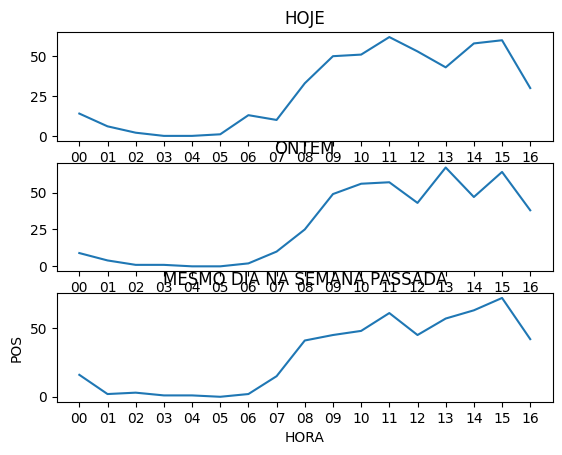

In [12]:
from plotting_tools import composed_plot

composed_plot(
    y1="yesterday",
    y2="same_day_last_week",
    data=df,
    title1="ONTEM",
    title2="MESMO DIA NA SEMANA PASSADA",
    markers=None,
)


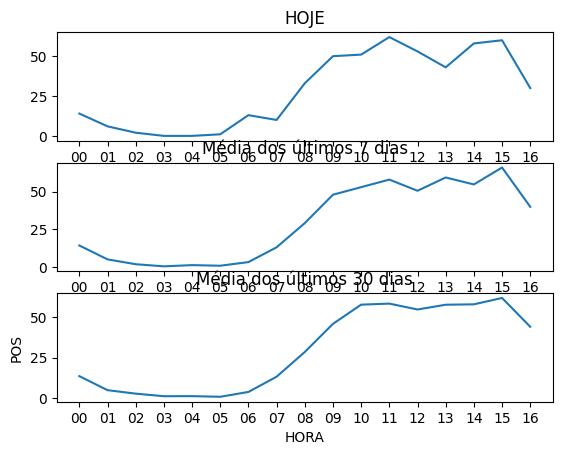

In [13]:
composed_plot(
    y1="avg_last_7days",
    y2="avg_last_30days",
    data=df,
    title1="Média dos últimos 7 dias",
    title2="Média dos últimos 30 dias",
    markers=None,
)

## Possíveis Anomalias

In [16]:
df.iloc[6,:]

avg_last_30days        3.8
avg_last_7days         3.4
same_day_last_week     2.0
yesterday              2.0
today                 13.0
Name: 06, dtype: float64

In [24]:
df.iloc[8,:]

avg_last_30days       28.55
avg_last_7days        29.20
same_day_last_week    41.00
yesterday             25.00
today                 33.00
Name: 08, dtype: float64

In [21]:
df.iloc[13,:]

avg_last_30days       57.85
avg_last_7days        59.40
same_day_last_week    57.00
yesterday             67.00
today                 43.00
Name: 13, dtype: float64

<AxesSubplot:>

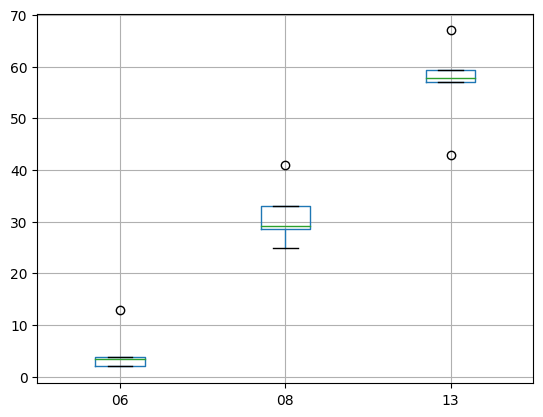

In [28]:
df.iloc[[6,8,13],:].T.boxplot()

### Comparando difierenças

In [30]:
df_diff = df.diff()
df_diff.head()

,avg_last_30days,avg_last_7days,same_day_last_week,yesterday,today
time,,,,,
00,NaN,NaN,NaN,NaN,NaN
01,-8.70,-9.2,-14.0,-5.0,-8.0
02,-2.15,-3.2,1.0,-3.0,-4.0
03,-1.60,-1.4,-2.0,0.0,-2.0
04,0.05,0.8,0.0,-1.0,0.0


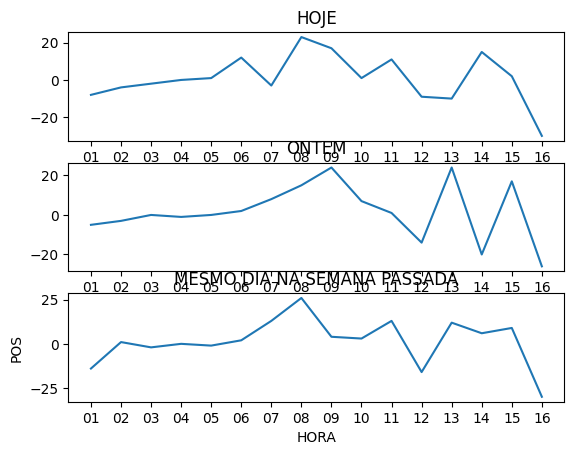

In [31]:
composed_plot(
    y1="yesterday",
    y2="same_day_last_week",
    data=df_diff,
    title1="ONTEM",
    title2="MESMO DIA NA SEMANA PASSADA",
    markers=None,
)


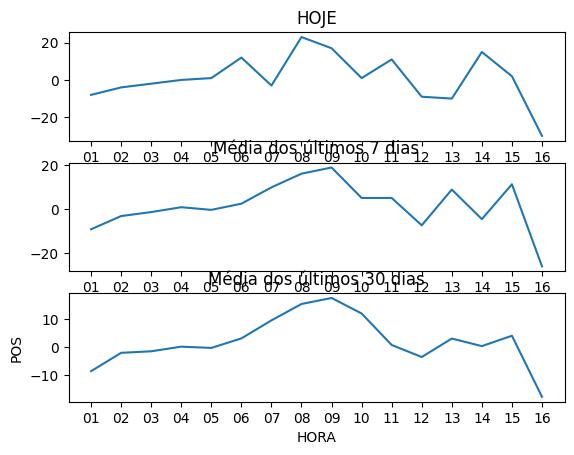

In [32]:
composed_plot(
    y1="avg_last_7days",
    y2="avg_last_30days",
    data=df_diff,
    title1="Média dos últimos 7 dias",
    title2="Média dos últimos 30 dias",
    markers=None,
)

In [37]:
df_diff.iloc[6,:]

avg_last_30days        3.0
avg_last_7days         2.4
same_day_last_week     2.0
yesterday              2.0
today                 12.0
Name: 06, dtype: float64

In [36]:
df_diff.iloc[8,:]

avg_last_30days       15.3
avg_last_7days        16.0
same_day_last_week    26.0
yesterday             15.0
today                 23.0
Name: 08, dtype: float64

In [35]:
df_diff.iloc[13,:]

avg_last_30days        2.95
avg_last_7days         8.80
same_day_last_week    12.00
yesterday             24.00
today                -10.00
Name: 13, dtype: float64

<AxesSubplot:>

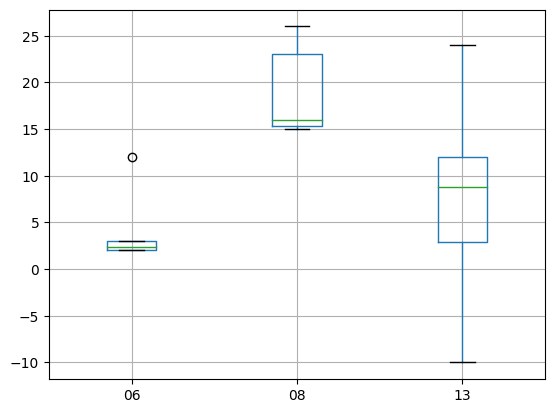

In [39]:
df_diff.iloc[[6,8,13],:].T.boxplot()

### Detectando Outilier

In [49]:
df.T.describe()

time,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,13.400000,4.420000,2.150000,0.750000,0.720000,0.560000,4.840000,12.290000,31.350000,47.600000,53.180000,59.310000,49.300000,56.850000,56.180000,64.810000,38.840000
std,2.622975,1.530359,0.782624,0.466369,0.672309,0.517687,4.633357,2.212578,6.095695,2.073644,3.932175,2.104875,5.121523,8.694395,5.909484,4.596792,5.452339
min,9.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,10.000000,25.000000,45.000000,48.000000,57.000000,43.000000,43.000000,47.000000,60.000000,30.000000
25%,13.600000,4.000000,2.000000,0.600000,0.000000,0.000000,2.000000,10.000000,28.550000,46.000000,51.000000,58.000000,45.000000,57.000000,54.800000,62.050000,38.000000
50%,14.000000,4.900000,2.000000,1.000000,1.000000,0.800000,3.400000,13.200000,29.200000,48.000000,53.000000,58.550000,50.600000,57.850000,58.000000,64.000000,40.000000
75%,14.400000,5.200000,2.750000,1.000000,1.200000,1.000000,3.800000,13.250000,33.000000,49.000000,56.000000,61.000000,53.000000,59.400000,58.100000,66.000000,42.000000
max,16.000000,6.000000,3.000000,1.150000,1.400000,1.000000,13.000000,15.000000,41.000000,50.000000,57.900000,62.000000,54.900000,67.000000,63.000000,72.000000,44.200000


In [56]:
q1 = df.T.describe().loc["25%",:]
q1

time
00    13.60
01     4.00
02     2.00
03     0.60
04     0.00
05     0.00
06     2.00
07    10.00
08    28.55
09    46.00
10    51.00
11    58.00
12    45.00
13    57.00
14    54.80
15    62.05
16    38.00
Name: 25%, dtype: float64

In [57]:
q3 = df.T.describe().loc["75%",:]
q3

time
00    14.40
01     5.20
02     2.75
03     1.00
04     1.20
05     1.00
06     3.80
07    13.25
08    33.00
09    49.00
10    56.00
11    61.00
12    53.00
13    59.40
14    58.10
15    66.00
16    42.00
Name: 75%, dtype: float64

In [60]:
iqr = q3 - q1

In [61]:
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

In [64]:
df["outlier"] = (df.today < limite_inferior) | (df.today > limite_superior)

In [65]:
df["outlier"]

time
00    False
01    False
02    False
03    False
04    False
05    False
06     True
07    False
08    False
09    False
10    False
11    False
12    False
13     True
14    False
15    False
16     True
Name: outlier, dtype: bool

In [66]:
df.iloc[16,:]

avg_last_30days       44.2
avg_last_7days        40.0
same_day_last_week    42.0
yesterday             38.0
today                 30.0
outlier               True
Name: 16, dtype: object